# Deep Q-Learning (DQL) Algorithm (2)

This notebook trains the DQL agent with a learning rate of 0.0001 and discount factor of 0.79.

In [1]:
import os
import json
import wandb
import gymnasium as gym
from matplotlib import pyplot as plt
import seaborn as sns
from models.dqn import DQN

## Initializing Environment and Hyperparameters

In [ ]:
env = gym.make('LunarLander-v2', continuous=False, render_mode='rgb_array')
learning_rate = 0.0001
discount_factor = 0.79
exploration_rate = 1.0
episodes = 500
max_steps = 1000

## Training

In [7]:
agent = DQL(env, learning_rate, discount_factor, exploration_rate)
history = agent.train(episodes, max_steps, log_wandb=True, save_episodes=True, save_interval=100)

[EP 1/500] - Reward: -59.4170 - Steps: 66 - Eps: 0.9801 - Time: 3.30s
[EP 2/500] - Reward: -21.6349 - Steps: 69 - Eps: 0.4899 - Time: 13.11s
[EP 3/500] - Reward: -389.6557 - Steps: 118 - Eps: 0.1496 - Time: 26.95s
[EP 4/500] - Reward: -405.4472 - Steps: 161 - Eps: 0.0297 - Time: 36.32s
[EP 5/500] - Reward: -50.3491 - Steps: 71 - Eps: 0.0145 - Time: 15.91s
[EP 6/500] - Reward: -405.0530 - Steps: 76 - Eps: 0.0100 - Time: 17.85s
[EP 7/500] - Reward: -45.4654 - Steps: 197 - Eps: 0.0100 - Time: 44.60s
[EP 8/500] - Reward: -118.2852 - Steps: 221 - Eps: 0.0100 - Time: 52.08s
[EP 9/500] - Reward: -225.7294 - Steps: 109 - Eps: 0.0100 - Time: 25.36s
[EP 10/500] - Reward: -272.9021 - Steps: 148 - Eps: 0.0100 - Time: 33.55s
[EP 11/500] - Reward: -328.8178 - Steps: 184 - Eps: 0.0100 - Time: 42.74s
[EP 12/500] - Reward: -242.9265 - Steps: 92 - Eps: 0.0100 - Time: 20.77s
[EP 13/500] - Reward: -543.1480 - Steps: 328 - Eps: 0.0100 - Time: 77.67s
[EP 14/500] - Reward: -337.5641 - Steps: 99 - Eps: 0.0100

epsilon,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
reward,▁▂▁▃▅▄▅▅▃▄▅▄▃██▃▅█▃▄▂█▄█▅▄▅██▃██▇█▃█▃▇██
steps,▁▁▁▂▂▁▃▃▂▄▂▂▃▄▃▂▂▄▃▃▃▃█▃▂▆▃▇▃▄▅▄▅▃▂▆▃▃▃▄
epsilon,0.01
reward,240.02
steps,438


In [8]:
# save history
if not os.path.exists('./history'):
        os.mkdir('./history')

with open('./history/dqn_history_2.json', 'w') as file:
    json.dump(history, file)

## Evaluation

In [2]:
with open('history\dql_history_2.json', 'r') as file:
    history = json.load(file)

rewards, avg_rewards, steps = history['reward'], history['avg_reward_100'], history['steps']

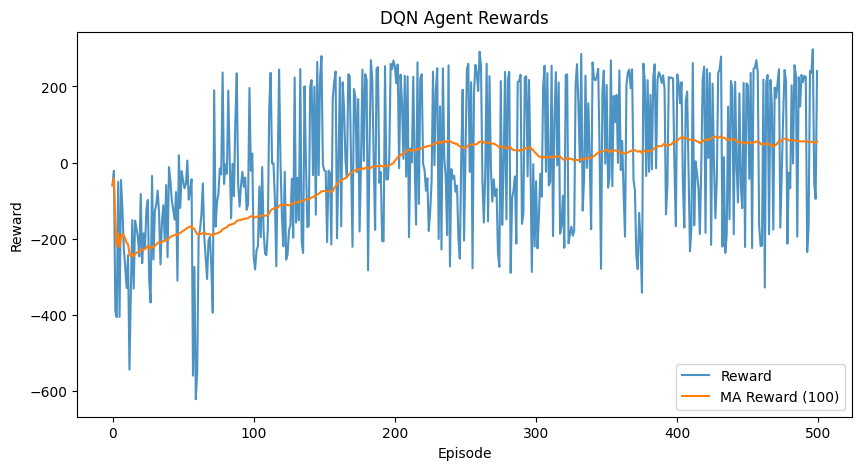

In [3]:
plt.figure(figsize=(10, 5))

plt.plot(rewards, alpha=0.8, label='Reward')
plt.plot(avg_rewards, label='MA Reward (100)')

plt.title('DQN Agent Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()

plt.show()

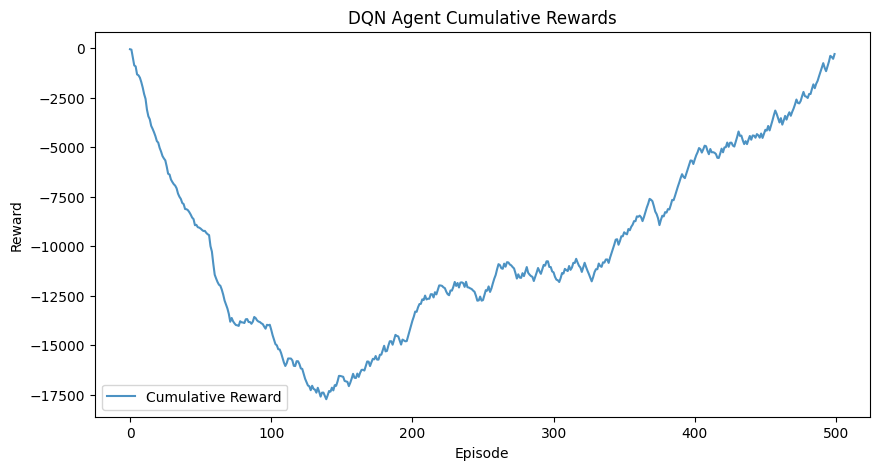

In [4]:
# plot cumulative reward
cumulative_reward = [sum(rewards[:i+1]) for i in range(len(rewards))]
plt.figure(figsize=(10, 5))

plt.plot(cumulative_reward, alpha=0.8, label='Cumulative Reward')

plt.title('DQN Agent Cumulative Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()

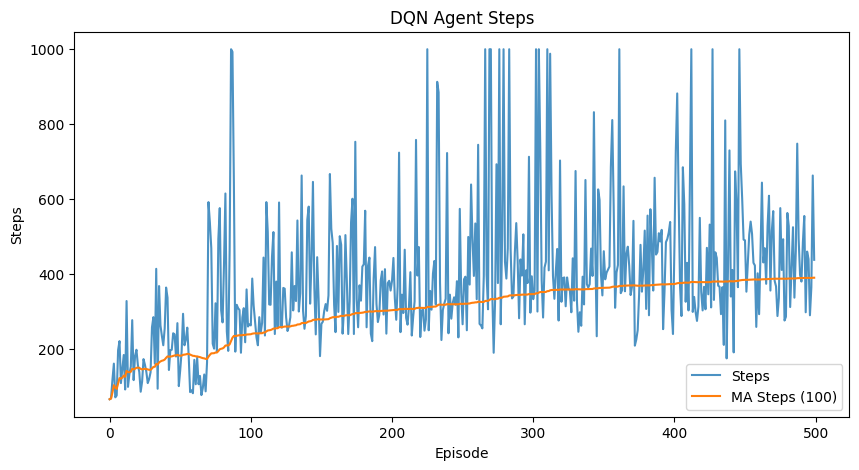

In [5]:
# plot steps and moving average steps
avg_steps = [sum(steps[:i+1])/(i+1) for i in range(len(steps))]
plt.figure(figsize=(10, 5))

plt.plot(steps, alpha=0.8, label='Steps')
plt.plot(avg_steps, label='MA Steps (100)')

plt.title('DQN Agent Steps')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.legend()
plt.show()